### yFinance
Nesta aula vamos trabalhar com dados financeiros disponíveis através do Yahoo Finance

In [8]:
pip install yfinance==0.2.54

Note: you may need to restart the kernel to use updated packages.


In [3]:
# pip install yfinance==0.2.54
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
rcParams['figure.figsize'] = 12,8
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Vamos começar analisando o desempenho da bolsa brasileira (BVSP).

In [11]:
ticker = yf.Ticker("^BVSP")
df = ticker.history(interval='1d', start= '2019-01-01')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-02:00,87887.0,91479.0,87536.0,91012.0,5615400,0.0,0.0
2019-01-03 00:00:00-02:00,91011.0,91596.0,89922.0,91564.0,6066200,0.0,0.0
2019-01-04 00:00:00-02:00,91577.0,92701.0,90824.0,91841.0,5322100,0.0,0.0
2019-01-07 00:00:00-02:00,91845.0,92552.0,91288.0,91699.0,4565000,0.0,0.0
2019-01-08 00:00:00-02:00,91699.0,92231.0,91064.0,92032.0,4496500,0.0,0.0


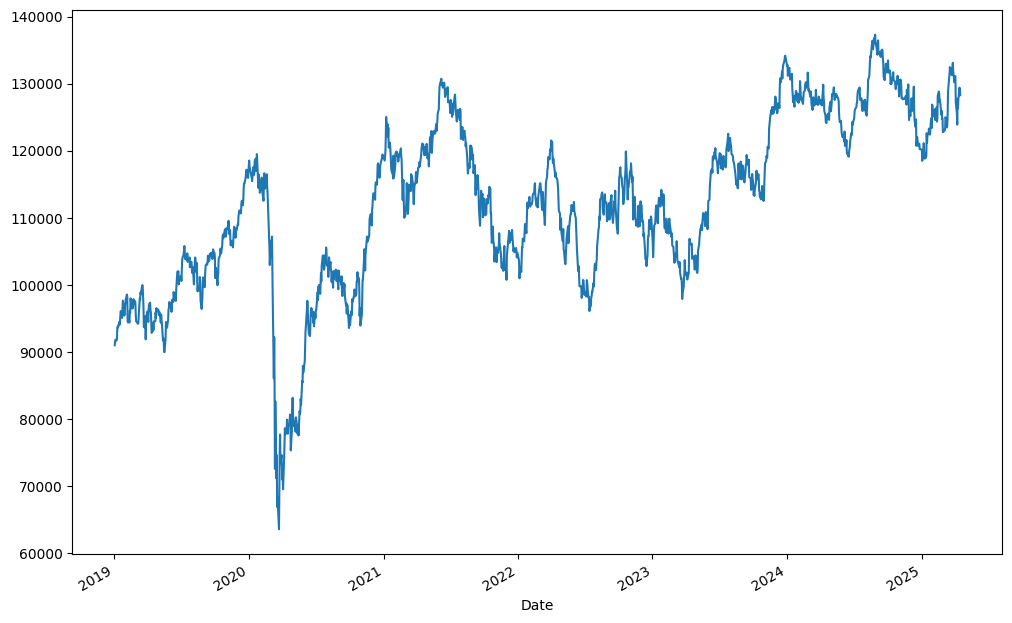

In [12]:
df['Close'].plot().autoscale(axis="x")

Vamos comparar o desempenho da Petrobras e da VALE. \
Petrobras - PRB \
VALE - VALE

In [17]:

ticker = yf.Ticker("PBR")
df1 = ticker.history(interval='1d', start= '2019-01-01')


ticker = yf.Ticker("VALE")
df2 = ticker.history(interval='1d', start= '2019-01-01')

df1['Close VALE'] = df2['Close']
df1.rename(columns={'Close' : 'Close PBR'}, inplace = True)

df1.head()

,Open,High,Low,Close PBR,Volume,Dividends,Stock Splits,Close VALE
Date,,,,,,,,
2019-01-02 00:00:00-05:00,4.463097,4.774397,4.429260,4.740560,31001800,0.0,0.0,8.520121
2019-01-03 00:00:00-05:00,4.872525,4.879292,4.713491,4.825153,25681900,0.0,0.0,8.115304
2019-01-04 00:00:00-05:00,4.882677,5.007874,4.842073,4.994339,21083900,0.0,0.0,8.868010
2019-01-07 00:00:00-05:00,5.045094,5.258267,4.889444,5.095850,37305100,0.0,0.0,8.747829
2019-01-08 00:00:00-05:00,5.190592,5.221046,5.099232,5.143220,17556900,0.0,0.0,8.893312


### Exercício
Compare o desempenho das seguintes empresas: Apple, Tesla, Walmart e GM.

Apple - AAPL \
Tesla - TSLA \
Walmart - WMT \
GM

In [31]:
ticker = yf.Ticker("AAPL")
dfaapl = ticker.history(interval='1d', start= '2019-01-01')
ticker = yf.Ticker("TSLA")
dftsla = ticker.history(interval='1d', start= '2019-01-01')
ticker = yf.Ticker("WMT")
dfwmt = ticker.history(interval='1d', start= '2019-01-01')
ticker = yf.Ticker("GM")
dfgm = ticker.history(interval='1d', start= '2019-01-01')

dfaapl['Apple Close'] = dfaapl['Close'] 
dfaapl['Tesla Close'] = dftsla['Close'] 
dfaapl['WMT Close'] = dfwmt['Close'] 
dfaapl['GM Close'] = dfgm['Close'] 

dfaapl.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Apple Close,Tesla Close,WMT Close,GM Close
Date,,,,,,,,,,,
2019-01-02 00:00:00-05:00,36.944458,37.889001,36.787034,37.667175,148158800,0.0,0.0,37.667175,20.674667,28.215212,31.011353
2019-01-03 00:00:00-05:00,34.342211,34.757238,33.869941,33.915260,365248800,0.0,0.0,33.915260,20.024000,28.070114,29.729971
2019-01-04 00:00:00-05:00,34.473390,35.432244,34.299271,35.363071,234428400,0.0,0.0,35.363071,21.179333,28.245441,30.725582
2019-01-07 00:00:00-05:00,35.468006,35.499014,34.800147,35.284344,219111200,0.0,0.0,35.284344,22.330667,28.577953,31.675091
2019-01-08 00:00:00-05:00,35.673157,36.212216,35.425097,35.956997,164101200,0.0,0.0,35.956997,22.356667,28.777460,32.089935


<Axes: xlabel='Date'>

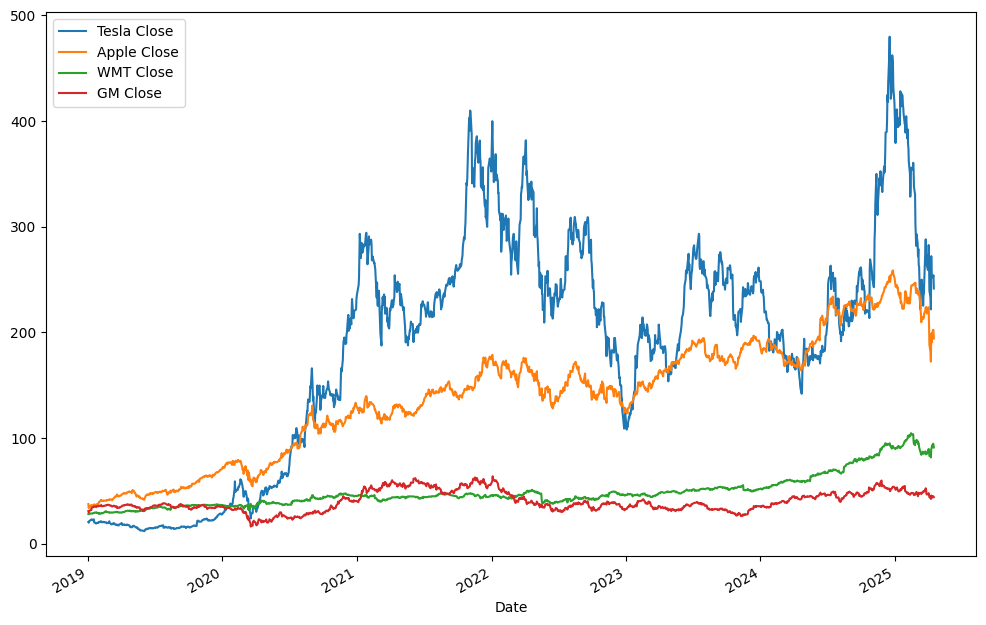

In [32]:
dfaapl[['Tesla Close' , 'Apple Close' , 'WMT Close' , 'GM Close']].plot()
#dfaapl['Apple Close']

### Validação Walk Forward
O mercado de ações é altamente volátil. Dessa forma, valores anteriores da cotação da ação não constituem uma informação muito relevante. Por isso, o modelo AR não é o mais indicado para realizar previsões neste contexto. 

Para melhorar essa limitação do modelo AR, podemos utilizar um mecanismo conhecido como validação walk-forward, no qual o modelo é retreinado com dados reais à medida que eles se tornam disponíveis para previsões adicionais. Veremos como utilizar a validação walk forward para realizar previsões dos valores das ações da empresa NetFlix.

Nota: Essa solução não é adequada para realizar previsões futuras a médio / longo prazo. Aprenderemos soluções mais robustas nas próximas aulas.


Vamos começar carregando os dados de 2023 e 2024 da NetFlix.

In [35]:
ticker = yf.Ticker('NFLX')
df = ticker.history(interval='1d' , start='2023-01-01' ,)
df2 = df['Close'].resample('1D').mean().fillna(method='ffill')
df2.head()

Date
2023-01-03 00:00:00-05:00    294.950012
2023-01-04 00:00:00-05:00    309.410004
2023-01-05 00:00:00-05:00    309.700012
2023-01-06 00:00:00-05:00    315.549988
2023-01-07 00:00:00-05:00    315.549988
Freq: D, Name: Close, dtype: float64

Agora vamos plotar o gráfico do valor diário de fechamento das ações.

<Axes: xlabel='Date'>

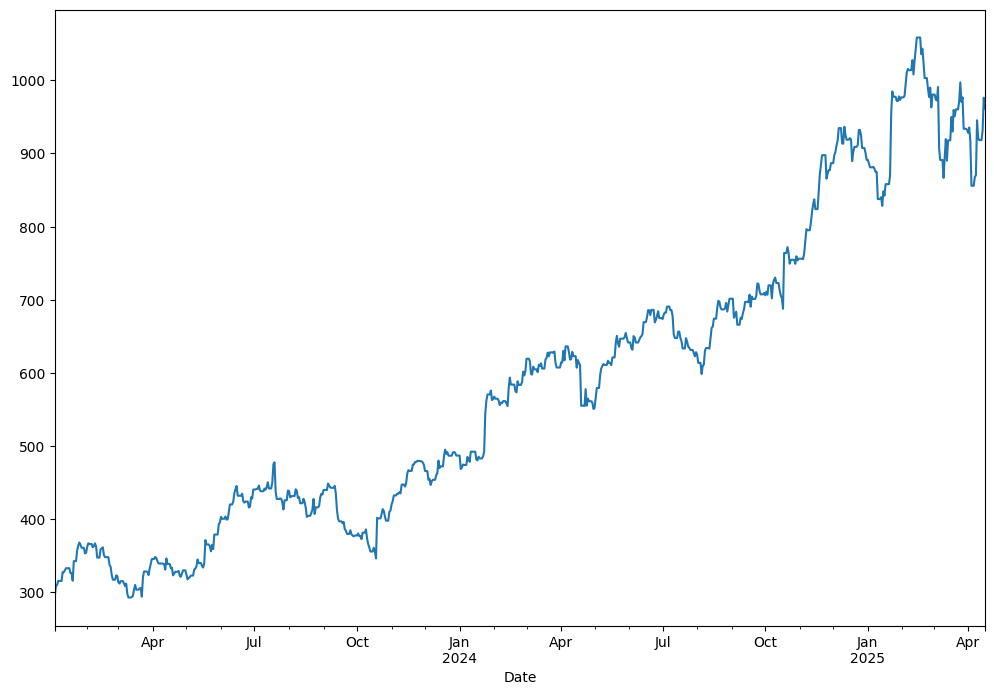

In [36]:
df2.plot(figsize=(12,8))

Vamos agora obter o gráfico de autocorrelação parcial.

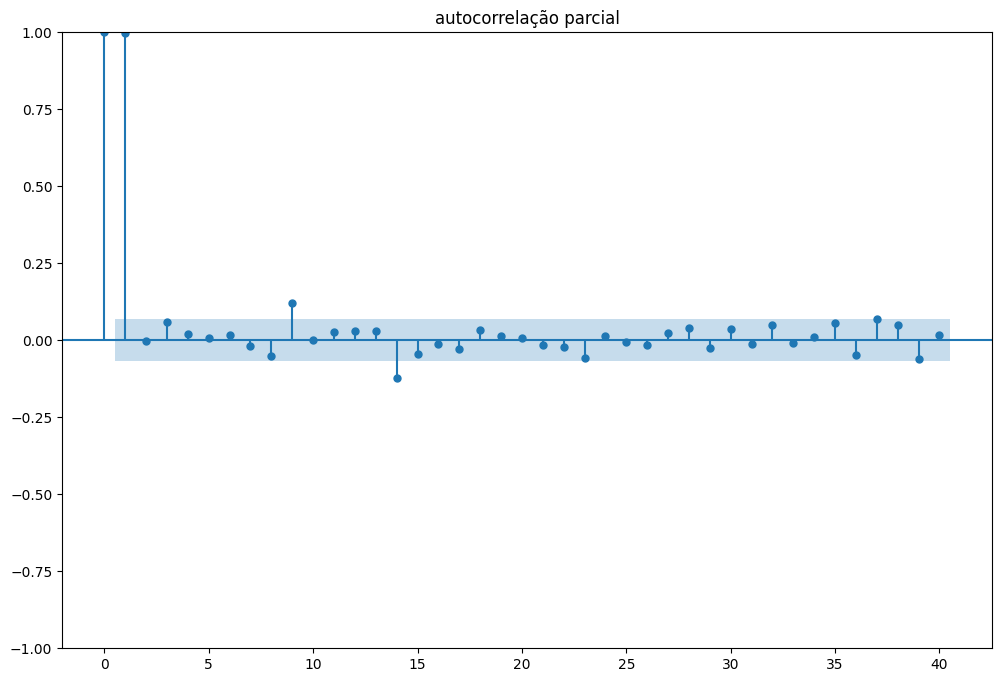

In [38]:
plot_pacf(df2, title='autocorrelação parcial' , lags=40);

Próximo passo é dividir o dataframe em treino e teste.

In [40]:
treino = df2.iloc[:546]
teste = df2.iloc[546:]

Coeficientes:
const       1.276614
Close.L1    0.998733
dtype: float64


Vamos agora fazer o fit do modelo.

In [43]:
model = AutoReg(treino, lags=1)
ARfit = model.fit()
print(f'Coeficientes:\n{ARfit.params}')

Coeficientes:
const       1.276614
Close.L1    0.998733
dtype: float64


Nesta etapa faremos a previsão utilizando a validação walk forward.

In [66]:
prev = pd.Series()
history = treino.copy()
for i in range(len(teste)):
    model = AutoReg(history , lags=3).fit()
    next_prev = model.forecast()
    prev = pd.concat([prev , next_prev])
    history = pd.concat([history , teste[next_prev.index - 1? next_prev.index -1 : 1]])


SyntaxError: invalid syntax (1220831923.py, line 7)

In [63]:
df_prev_teste = pd.DataFrame({'Teste': teste , 'Previsão' : prev}).shift(12)
df_prev_teste.head()

,Teste,Previsão
2024-07-02 00:00:00-04:00,NaN,NaN
2024-07-03 00:00:00-04:00,NaN,NaN
2024-07-04 00:00:00-04:00,NaN,NaN
2024-07-05 00:00:00-04:00,NaN,NaN
2024-07-06 00:00:00-04:00,NaN,NaN


Finalmente, vamos comparar os valores gerados no processo de previsão e os valores de teste.

<Axes: >

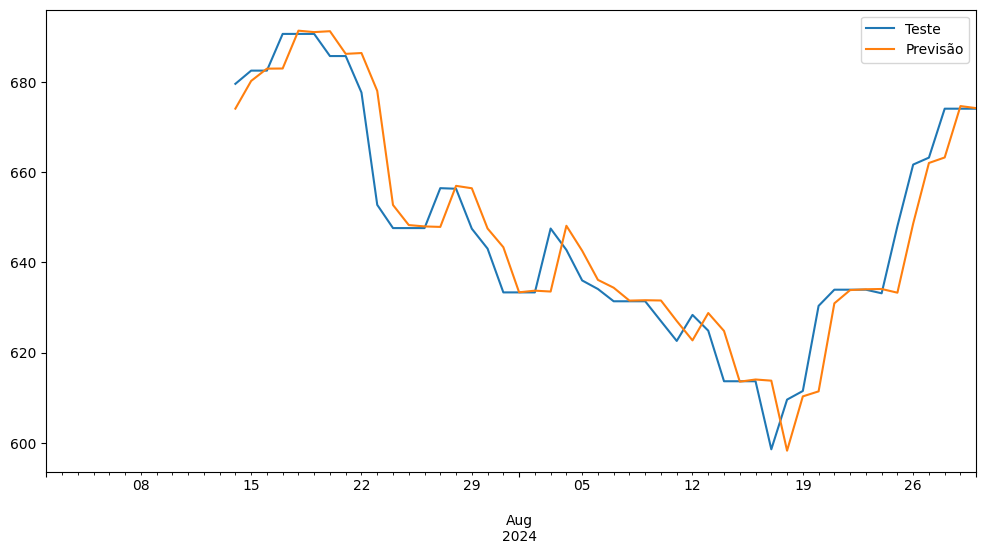

In [64]:
df_prev_teste[:60].plot(legend=True, figsize=(12,6))